# Aykırı Gözlem Analizi

## Aykırı Değerleri Yakalamak

In [1]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) # sadece sayisal veriler secildi
df = df.dropna() # eksik degerler silinir
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df["table"] #table degiskeni icin aykiri deger yakalancak

In [3]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

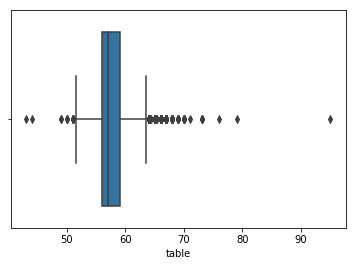

In [4]:
sns.boxplot(x = df_table);

##### Boxplot kullanarak aykiri degerleri tespit edecegiz.

In [8]:
Q1 = df_table.quantile(0.25) # 1. ceyrek (mavi kutunun sol sınırı)
Q3 = df_table.quantile(0.75) # 3. ceyrek (mavi kutunun sag siniri)
IQR = Q3-Q1

In [9]:
Q1

56.0

In [10]:
Q3

59.0

In [11]:
IQR

3.0

In [12]:
alt_sinir = Q1- 1.5*IQR # 1. ceyrek degerinden IQR kadar sapma kabul et ve alt sinir belirle
ust_sinir = Q3 + 1.5*IQR # 3. ceyrek degerinden IQR kadar sapma kabul et ve ust sinir olarak belirle

##### IQR ile aykiri gozlem tespitinde alt ve ust sinir icin 1.5 carpani sabit.

In [10]:
alt_sinir # boxplot grafiginde sol taraftaki uzun sinir cizgisi

51.5

In [11]:
ust_sinir #boxplot grafiginde sag taraftaki uzun sinir cizgisi

63.5

In [15]:
(df_table < alt_sinir) | (df_table > ust_sinir)
# aykiri gozlemler siralanir True

0        False
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
53910    False
53911    False
53912    False
53913    False
53914    False
53915    False
53916    False
53917    False
53918    False
53919    False
53920    False
53921    False
53922    False
53923    False
53924    False
53925    False
53926    False
53927    False
53928    False
53929    False
53930    False
53931    False
53932    False
53933    False
53934    False
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [16]:
aykiri_tf = (df_table < alt_sinir)

In [19]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [15]:
df_table[aykiri_tf] # fancy index

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [16]:
df_table[aykiri_tf].index  # aykiri verilerin indexleri

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

## Aykiri degerler icin cozumler

#### 1-) Silme

In [21]:
import pandas as pd

In [23]:
type(df_table)

pandas.core.series.Series

In [28]:
df_table = pd.DataFrame(df_table)

In [31]:
df_table.shape # dfnin saf hali

(53940, 1)

In [38]:
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)] 
# aykiri gozlem olmayanlar listelenir


* *~ (tilda) isareti icine yazilan sarti saglamayanlari dondurur.*

In [39]:
t_df.shape 
# 600 kusur aykiri gozlemi cikarttik

(53335, 1)

### 2-) Ortalama ile Doldurma

In [41]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [42]:
df_table = df["table"]

In [43]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [44]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [45]:
df_table.mean()

57.45718390804603

In [48]:
df_table[aykiri_tf] = df_table.mean() # aykiri degerlere ortalama atandi

C:\Users\90530\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_table[aykiri_tf]

1515     57.459505
3238     57.459505
3979     57.459505
4150     57.459505
5979     57.459505
7418     57.459505
8853     57.459505
11368    57.459505
22701    57.459505
25179    57.459505
26387    57.459505
33586    57.459505
35633    57.459505
45798    57.459505
46040    57.459505
47630    57.459505
Name: table, dtype: float64

### 3-) Baskılama Yöntemi

In [60]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


##### Baskilama yonteminde aykiri deger hangi sinira yakinsa ona cekilir.

In [61]:
df_table = df["table"]

In [62]:
df_table[aykiri_tf] # alt sinirlar

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [64]:
alt_sinir

51.5

In [65]:
df_table[aykiri_tf] = alt_sinir # alt sinira yakin aykiri degerler alt sinira cekildi

C:\Users\90530\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

## Çok Değişkenli Aykırı Gözlem Analizi

### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [2]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [4]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
# ilk parametre cevresindeki komsu sayisi, 2.parametre yogunlugu ifade eder

In [5]:
clf.fit_predict(df) # algoritma calistiriliyor

array([-1, -1, -1, ...,  1,  1,  1])

In [6]:
df_scores = clf.negative_outlier_factor_

In [7]:
df_scores[0:10] # yogunluk skorlari elimizde

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [8]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [9]:
esik_deger = np.sort(df_scores)[13]

In [10]:
aykiri_tf = df_scores > esik_deger

In [11]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

#### Cok Degiskenli Aykiri Gozlemde Silme 

In [12]:
yeni_df  = df[df_scores > esik_deger]

In [13]:
yeni_df
# aykiri olmayan degerlere ulastik

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
6,0.24,62.3,57.0,336,3.95,3.98,2.47
7,0.26,61.9,55.0,337,4.07,4.11,2.53
8,0.22,65.1,61.0,337,3.87,3.78,2.49
9,0.23,59.4,61.0,338,4.00,4.05,2.39


In [14]:
df[df_scores < esik_deger]
# aykiri olanlar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [15]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [ ]:
#### Cok Degiskenli Aykiri Gozlemde Silme 

In [17]:
baski_deger = df[df_scores == esik_deger]
baski_deger

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [18]:
aykirilar = df[~aykiri_tf]

In [19]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [20]:
aykirilar.to_records(index = False) # indekslerden kurtulduk

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [23]:
res = aykirilar.to_records(index = False)

In [24]:
res[:] = baski_deger.to_records(index = False)

In [26]:
res # aykiri degerler baski degerler degistirildi

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [27]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [28]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)
# olusturulan indekssiz array df hale getirilip ana dfe atanacak

In [29]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


## Eksik Gozlem Analizi

* *NA,null,NaN veriler silinebilir ya da doldurulabilir hangisinin yapilacagi probleme gore degisir*

* *Eksik veriler eger rastgele olusmus ise silinebilirler.Yani verinin NA olmasi diger gozlem durumlariyla da uyusuyor ise silinebilir.*

* *Eksik veri silinirken genel degerlendirme yapilir.Bu islemin az veri kaybina sebep olacagi düsünülürse silinir*

* *Verinin rastgele olusma durumunu kavramak icin 2 temel yontem vardir
    1-)Gorsel Teknikler
    2-)Little MCAR TEST*


#### Hizli Cozum

In [6]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [54]:
df.isnull().sum() # her degiskendeki eksik deger sayisi

V1    2
V2    3
V3    2
dtype: int64

In [55]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [56]:
df.isnull().sum().sum() # butun eksik veriler

7

In [57]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [58]:
df[df.isnull().any(axis = 1)] # en az 1 eksik deger barindiran satirlar geldi

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [59]:
df[df.notnull().all(axis = 1)] # hepsi dolu olanlar getirildi

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [60]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()] # sabit yontem

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


* *dropna bir gozlem biriminde 1 tane bile eksik gozlem varsa onu tamamen siler*

In [50]:
df.dropna() # kalici degildir

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [52]:
df.dropna(inplace = True)
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [67]:
df["V1"].fillna(df["V1"].mean()) # V1 gozlemindeki NA veriler o gozlemin ortalmasiyla dolduruldu

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [72]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0) # butun eksik veriler kendi ortalamasiyla dolduruldu

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Eksik Veri Rastsallik Sorgulama

In [1]:
!pip install missingno

In [7]:
import missingno as msno

In [11]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [12]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

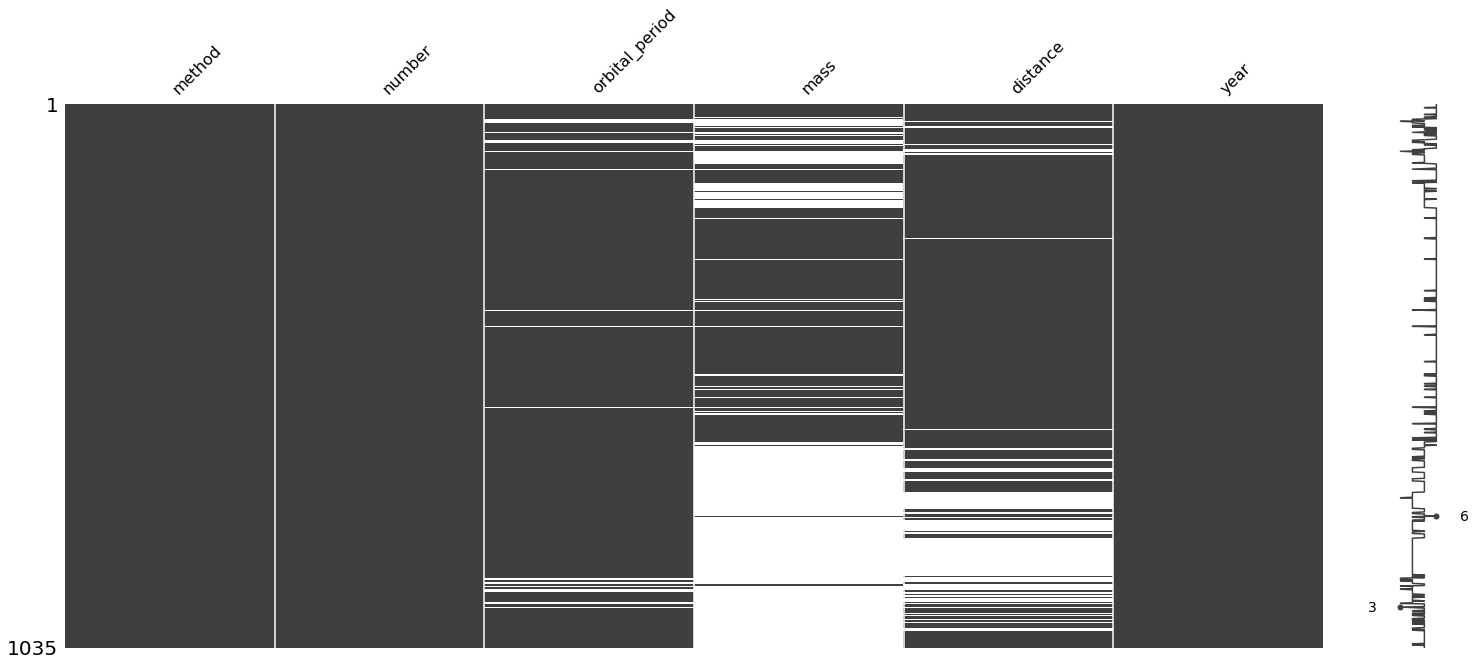

In [13]:
msno.matrix(df); # eksik verilerin rastsalligi gozlemlenir

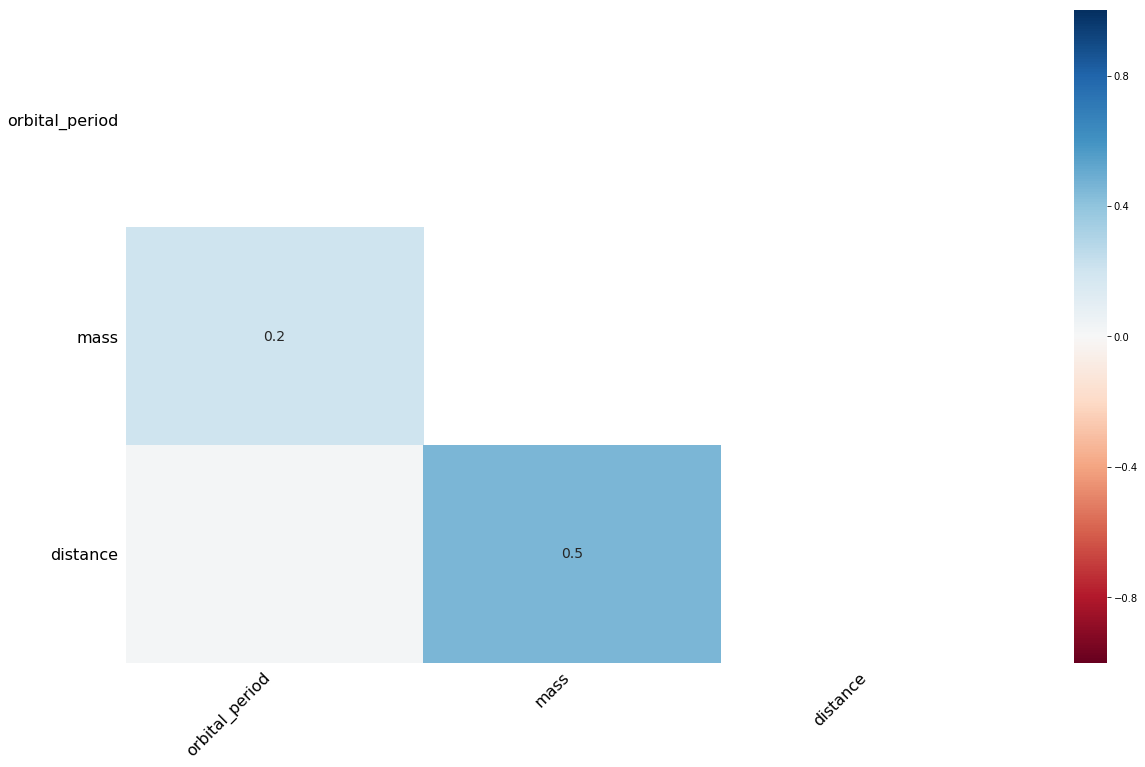

In [15]:
msno.heatmap(df); # yokluk korelasyonu incelenir

## Eksik Verilerde Silme İslemi

In [25]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [17]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [18]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [20]:
df.dropna(how = "all") # butun verileri eksik olan gozlem silinir

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [27]:
df.dropna(axis = 1) # icinde bir tane bile NA bulunan degisken silinir

""
0
1
2
3
4
5
6
7
8


In [28]:
df.dropna(axis = 1, how = "all") # tum degerleri NA olan degisken silinir

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Eksik Verilerde Deger Atama

* *Sayisal degiskenler icin;*

In [38]:
df["V1"].fillna(df["V1"].mean()) # degisken ortalmasiyla doldurma ilkel yol

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [40]:
df.apply(lambda x: x.fillna(x.mean()),axis = 0) # degisken ortalamasiyla doldurma dinamik yol

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


* *Kategorik degiskenler icin;*

In [44]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [45]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [46]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

In [47]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [42]:
df["departman"].mode()[0] # eksik kategorik veiler mod ile doldurulur

'IK'

In [48]:
df["departman"].fillna(df["departman"].mode()[0])# departman degiskenin moduyla doldurduk

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [49]:
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [50]:
df["departman"].fillna(method = "bfill") # NaN veri mod ile degil sonrasindaki deger ile doldurulur

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [51]:
df["departman"].fillna(method = "ffill") # # NaN veri oncesindeki deger ile doldurulur

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

# Değişken Standardizasyonu (Veri Standardizasyonu)

In [1]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


## Standardizasyon

* *Degerleri belli bir aralikta normal dagilim seklinde dagitir*

from sklearn import preprocessing

In [3]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

## Normalizasyon

* *Degerleri 0-1 arasina donusturur*

In [4]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

## Min-Max Donusumu

* *Degerleri istenen araliga gore donusturur*

In [9]:
scaler = preprocessing.MinMaxScaler(feature_range = (10,20)) # 10-20 arasinda dagitildi

In [11]:
scaler.fit_transform(df) # donusturme isi icin bir donsuturucu olusturduk

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

# Degisken Donusumleri

In [4]:
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 0-1 Donusumu

* *Kategorik verilerde en sik kullanilan donusum*

In [5]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder() #donusturucu tanimlandi

In [6]:
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [7]:
df["new_sex"] = lbe.fit_transform(df["sex"]) # yeni veri dfe eklendi
df

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
5,25.29,4.71,Male,No,Sun,Dinner,4,1
6,8.77,2.00,Male,No,Sun,Dinner,2,1
7,26.88,3.12,Male,No,Sun,Dinner,4,1
8,15.04,1.96,Male,No,Sun,Dinner,2,1
9,14.78,3.23,Male,No,Sun,Dinner,2,1


## 1 ve Digerleri(0) Donusumu

In [15]:
import numpy as np
import pandas as pd
df["new_day"] = np.where(df["day"].str.contains("Sun"), 1, 0) # "Sun" degerine 1 geri kalana 0 atar
df 

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
5,25.29,4.71,Male,No,Sun,Dinner,4,1,1
6,8.77,2.00,Male,No,Sun,Dinner,2,1,1
7,26.88,3.12,Male,No,Sun,Dinner,4,1,1
8,15.04,1.96,Male,No,Sun,Dinner,2,1,1
9,14.78,3.23,Male,No,Sun,Dinner,2,1,1


## Cok Sinifli Donusum

In [9]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder() 

In [10]:
lbe.fit_transform(df["day"]) # sinif sayisina gore 0 dan baslayarak donusturdu

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

* *Bu donusumlerde sanki kategorik degiskenler arasi bir ustunluk varmis gibi algilanabilir buna dikkat etmek gerek.Cozum icin ONE HOT DONUSUMU yapilir.*

* **One-Hot Donusumu ve Dummy Tuzagi**

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [18]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"]) # sex degiskeni kategorik ola
# sayilar pozitif negatif olarak temsil eder

In [19]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,new_sex,new_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


In [20]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,new_sex,new_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1


* *One-Hot donusumu kategorik degiskenlerin kategorilerine parcalayarak agirlik tespitini kolaylastirir*